In [82]:
import os
import re
import random
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt
import cv2
import shutil



def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)



dataset_dir=os.getcwd()+"\\Dataset"
print("Subfolders Present are :-",os.listdir(dataset_dir))

Subfolders Present are :- ['Female Faces', 'Male Faces']


In [ ]:
## There are Two classes "Male and Female"

In [14]:
for subfolder in os.listdir(dataset_dir):
    count= len(os.listdir(dataset_dir+"//"+subfolder))
    print("There are total of ",count," Images for ",subfolder)    

There are total of  2698  Images for  Female Faces
There are total of  2720  Images for  Male Faces


In [ ]:
## Displaying Samples for each Class

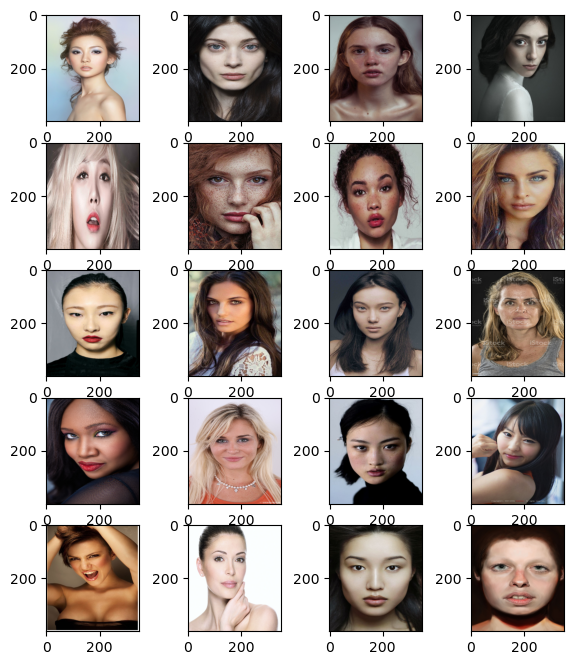

In [38]:
subfolder='Female Faces'
fig=plt.figure(figsize=(7,8))
columns=4
rows=5
files = os.listdir(dataset_dir+"//"+subfolder)
for i in range(1,columns*rows +1):
    file=random.choice(files)
    img=cv2.imread(dataset_dir+"//"+subfolder+"//"+file)
    img=bigger = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (350,400 ))    
    fig.add_subplot(rows,columns,i)
    plt.imshow(img)
plt.show()

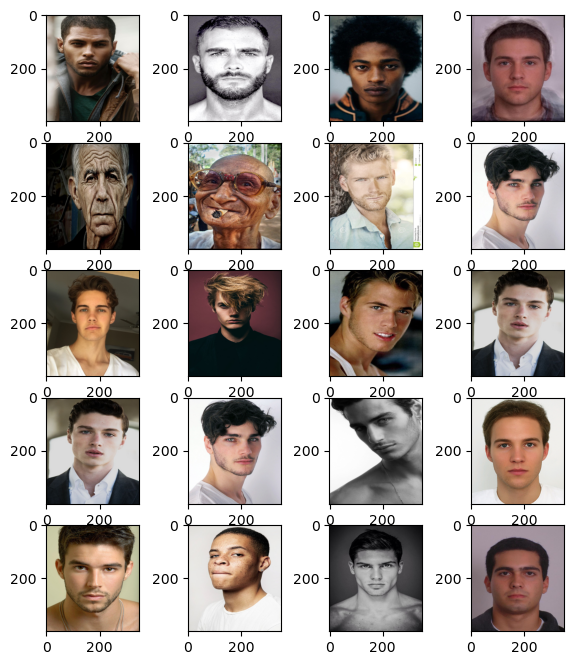

In [40]:
subfolder='Male Faces'
fig=plt.figure(figsize=(7,8))
columns=4
rows=5
files = os.listdir(dataset_dir+"//"+subfolder)
for i in range(1,columns*rows +1):
    file=random.choice(files)
    img=cv2.imread(dataset_dir+"//"+subfolder+"//"+file)
    img=bigger = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (350,400 ))    
    fig.add_subplot(rows,columns,i)
    plt.imshow(img)
plt.show()

In [58]:
## Using prebuild haarcascade_frontalface_default model for detection of faces

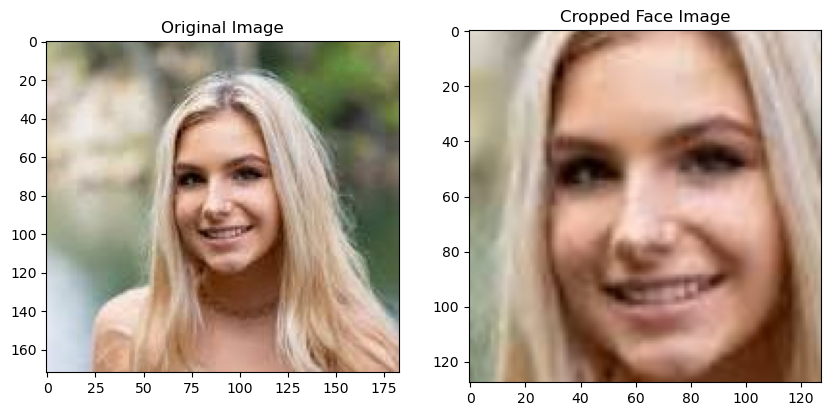

In [59]:
input_file="Sample.jpg"

fig = plt.figure(figsize=(10, 10))
rows=1;columns=2

haar_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
img=cv2.imread(input_file)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig.add_subplot(rows, columns, 1) 
plt.imshow(img)
plt.title("Original Image")

faces_rect = haar_cascade.detectMultiScale(gray_img, 1.1, 9)
for(x,y,w,h) in faces_rect:
    output=img[y:y+h,x:x+w,:]
    img=cv2.resize(output,(256,256))
    fig.add_subplot(rows, columns, 2)
    plt.imshow(img)
    plt.title("Cropped Face Image")


In [64]:
## renaming all the images in Dataset for easy accessing 

In [74]:
i=0
Gender='F'
output_folder=os.getcwd()+"/"+"Renamed_dataset"
if(not os.path.isdir(output_folder)):
        os.mkdir(output_folder)
        
for subfolder in os.listdir(dataset_dir):
    if(subfolder=='Female Faces'):
        Gender='F'
    else:
        Gender='M'
    input_dir=dataset_dir+"/"+subfolder
    output_dir=output_folder+"/"+subfolder
    if(not os.path.isdir(output_dir)):
        os.mkdir(output_dir)
    i=0
    for file in tqdm(os.listdir(input_dir),"Renaming Images "):
        input_file=input_dir+"/"+file
        index=file.find('.')
        extension=file[index:]
        output_file=output_dir+"/"+Gender+"_"+str(i)+extension
        os.rename(input_file,output_file)
        i=i+1


Renaming Images : 100%|███████████████████████████████████████████████████████████| 2720/2720 [00:07<00:00, 374.48it/s]


In [75]:
# Removing the Previous Dataset and Renaming the new Dataset to Previous one 
shutil.rmtree(dataset_dir, ignore_errors=False, onerror=None)
os.rename(output_folder, dataset_dir)

In [60]:
## Creating Cropped face Dataset: Faces from the image are Cropped and saved in the "Cropped_face_Dataset"  Directory.

In [94]:
croppedface_dir=os.getcwd()+"/Cropped_face_Dataset"

if(not os.path.isdir(croppedface_dir)):
    os.mkdir(croppedface_dir)
    
for subfolder in os.listdir(dataset_dir):
    input_dir=dataset_dir+"/"+subfolder
    output_dir=croppedface_dir+"/"+subfolder
    if(not os.path.isdir(output_dir)):
        os.mkdir(output_dir)
    files=sorted_alphanumeric(os.listdir(input_dir))
    for file in tqdm(files,"Processing Images "):
        input_file=input_dir+"/"+file
        output_file=output_dir+"/"+file
        
        haar_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
        img=cv2.imread(input_file)
        if img is None:
            continue
        else:        
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            faces_rect = haar_cascade.detectMultiScale(gray_img, 1.1, 9)
            for(x,y,w,h) in faces_rect:
                output=img[y:y+h,x:x+w,:]
                try:
                    img=cv2.resize(output,(256,256))
                    cv2.imwrite(output_file,img)
                except Exception as e:
                    continue
                

Processing Images : 100%|██████████████████████████████████████████████████████████| 2720/2720 [23:59<00:00,  1.89it/s]


In [111]:
# Removing the Previous Dataset and Renaming the new Dataset to Previous one 
shutil.rmtree(dataset_dir, ignore_errors=False, onerror=None)
os.rename(croppedface_dir, dataset_dir)

In [109]:
## Handling Exceptional-Images Generated by haarcascade_frontalface_default.xml

C:\Users\bhara\AppData\Local\Temp\ipykernel_5860\1067655451.py:27: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(faces_rect==()):


Text(0.5, 1.0, 'This Image is ok ')

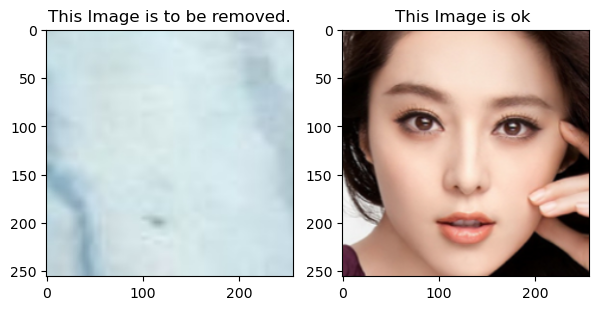

In [110]:
# 1st image 
input_file="Sample2.jpg"
fig = plt.figure(figsize=(7,5))
rows=1;columns=2

haar_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
img=cv2.imread(input_file)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces_rect = haar_cascade.detectMultiScale(gray_img, 1.1, 9)
if(faces_rect==()):
    title1="This Image is to be removed."
else:
    title1="This Image is ok "
fig.add_subplot(rows, columns, 1) 
plt.imshow(img)
plt.title(title1)
    
# 2nd image    
input_file="Sample3.jpg"

haar_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
img=cv2.imread(input_file)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces_rect = haar_cascade.detectMultiScale(gray_img, 1.1, 9)
if(faces_rect==()):
    title2="This Image is to be removed."
else:
    title2="This Image is ok "
    
fig.add_subplot(rows, columns, 2) 
plt.imshow(img)
plt.title(title2)

In [112]:
# removing Exceptional Images
for subfolder in os.listdir(dataset_dir):
    input_dir=dataset_dir+"/"+subfolder
    files=sorted_alphanumeric(os.listdir(input_dir))
    for file in tqdm(files,"Processing Images "):
        input_file=input_dir+"/"+file       
        haar_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
        img=cv2.imread(input_file)
        if img is None:
            if os.path.exists(input_file):
                os.remove(input_file)
        else:        
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            faces_rect = haar_cascade.detectMultiScale(gray_img, 1.1, 9)
            if(faces_rect==()):
                os.remove(input_file)
            


Processing Images :   0%|                                                             | 1/2372 [00:00<03:58,  9.95it/s]C:\Users\bhara\AppData\Local\Temp\ipykernel_5860\2845559491.py:15: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(faces_rect==()):
Processing Images : 100%|██████████████████████████████████████████████████████████| 2120/2120 [03:22<00:00, 10.47it/s]
